<a href="https://colab.research.google.com/github/kareemrb27/Lab2.1/blob/master/Unsupervised_Machine_Learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Machine Learning

Unsupervised Machine Learning involves finding patterns in data without labeled outcomes. It identifies hidden structures, relationships, or clusters in data, commonly used for tasks like clustering (e.g., k-means) and dimensionality reduction.

### Clustering: A Brief Overview

Clustering is an **unsupervised learning technique** used in machine learning and data science to group similar data points together. The goal is to divide a dataset into clusters, where data points within the same cluster are more similar to each other than to those in different clusters.


### Key Aspects of Clustering:
- Similarity/Dissimilarity: Measured using distance metrics like Euclidean or Manhattan distance.
- No Labels Required: Unlike supervised learning, clustering works without predefined labels or categories.
- Use Cases: Customer segmentation, anomaly detection, image compression, and recommendation systems.


### Common Clustering Algorithms:
- **k-Means**: Groups data into a fixed number of clusters.
- **Hierarchical Clustering**: Creates a tree-like structure of nested clusters.
- **DBSCAN**: Identifies clusters based on the density of data points, also recognizing outliers.

Clustering helps in pattern discovery and gaining insights from complex, unlabeled data.

## Data: Socio- Economic Data

Let's implement all the clustering methods using this data.

*Dataset used:** Socio Economic Data - [Link](https://raw.githubusercontent.com/curlsloth/IK_teaching/main/Country_socioeconomic-data.csv)



## Section 1: k-Means Clustering

k-Means is a **partition-based clustering algorithm** that groups data points into a predefined number of **k clusters** based on similarity. Each cluster is represented by a **centroid**, and the goal is to minimize the distance between data points and their respective centroids.

<center><img src="https://miro.medium.com/v2/resize:fit:1200/0*_XwxbKHayTU8QG44.png" width=500/></center>

### How it Works:
1. **Initialize**: Randomly select k points as initial centroids.
2. **Assign Points**: Assign each data point to the nearest centroid.
3. **Update Centroids**: Recalculate centroids as the mean of assigned points.
4. **Repeat**: Repeat the assignment and update steps until convergence (when centroids no longer change).


### Key Characteristics:
- Works efficiently with large datasets.
- Requires setting the number of clusters in advance.
- Struggles with irregular or overlapping clusters.



### Use Cases:
- Customer segmentation, market analysis, and image compression.


### Step 1: Loading the data

In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
# Import the warnings library
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Your code here

In [ ]:
# Importing data and transforming using PCA
country_data = pd.read_csv("https://raw.githubusercontent.com/curlsloth/IK_teaching/main/Country_socioeconomic-data.csv")

# View the data
country_data.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Step 2: Basic Pre-processing of the data

In [ ]:
# Check the summary stats
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Interpretation:
- There are huge differnece between the min and max, and also between 75th percentile and max. This indicates the presence of outliers.

In [ ]:
# Import the required libraries
from scipy import stats

# Checking for outliers using the Z-score
z = np.abs(stats.zscore(country_data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]))

# Removing the outliers
country_data_outliers_removed = country_data[(z<3).all(axis=1)]

# Check the summary stats after removing outliers
country_data_outliers_removed.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,37.224183,38.670582,6.774706,45.735725,14365.222222,7.024150,70.457516,2.956340,10589.379085
std,36.358238,20.352828,2.539936,19.143349,13406.165312,6.949213,8.229230,1.477622,13945.393875
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,46.500000,1.230000,231.000000
25%,8.700000,23.800000,4.970000,30.900000,3340.000000,1.770000,65.300000,1.800000,1310.000000
50%,20.300000,35.000000,6.320000,43.300000,9920.000000,5.140000,72.500000,2.480000,4540.000000
75%,62.000000,50.600000,8.500000,58.600000,20400.000000,10.100000,76.500000,3.910000,12100.000000
max,150.000000,103.000000,14.200000,108.000000,57600.000000,39.200000,82.800000,6.590000,58000.000000


### Interpretation:
- The extreme max values are removed.

In [ ]:
# Splitting into features and target
X = country_data_outliers_removed.drop('country',axis =1)
y = country_data_outliers_removed['country']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Apply dimensionality reduction
pca_final = PCA(n_components=4) # Play around with differnt values and check the results
X_pca_final = pca_final.fit_transform(X_scaled)

In [ ]:
X_pca_final

array([[-3.13080623e+00, -4.71116635e-01,  1.33627369e+00,
         6.41322074e-01],
       [ 5.51781057e-01, -2.30631502e-01, -7.12343377e-02,
        -1.37703623e+00],
       [-3.56256970e-01, -5.42353969e-01, -1.81815917e+00,
        -2.16783079e-01],
       [-3.45432284e+00,  1.11447049e+00, -1.55398611e+00,
         2.16845710e+00],
       [ 1.30895672e+00,  6.12032735e-01, -6.52868093e-02,
        -6.87559139e-01],
       [ 1.63504490e-01, -2.08440417e+00, -1.25409486e+00,
         2.08594880e-01],
       [-1.36309667e-01, -4.19282341e-01, -7.49082518e-01,
        -1.48812166e+00],
       [ 3.33525876e+00, -2.43819201e+00,  3.79190352e-01,
         1.27992998e+00],
       [ 3.94908129e+00, -4.78883220e-01,  8.80088784e-01,
         1.46475197e+00],
       [-1.43114312e-01, -4.22884350e-01, -1.43331258e+00,
         2.07409260e-01],
       [ 1.80098115e+00, -5.18925051e-01,  6.24775714e-01,
         5.87294120e-03],
       [ 2.12026608e+00,  8.55676701e-01, -1.36767832e+00,
      

### Step 3: Apply Clustering

In [ ]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# k-means with some arbitrary k (number of clusters)
kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=123)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=5, random_state=123)

In [ ]:
# Print k-means labels
kmeans.labels_

array([1, 4, 4, 3, 2, 4, 4, 0, 0, 4, 0, 2, 4, 2, 2, 0, 2, 1, 2, 4, 2, 1,
       4, 2, 1, 1, 2, 1, 0, 2, 1, 1, 4, 4, 4, 1, 1, 3, 4, 1, 2, 0, 2, 0,
       4, 4, 4, 4, 3, 1, 2, 2, 0, 0, 3, 1, 2, 0, 1, 0, 4, 4, 1, 1, 2, 2,
       0, 4, 4, 4, 4, 0, 0, 0, 4, 0, 2, 3, 1, 1, 2, 1, 2, 2, 1, 1, 3, 2,
       2, 1, 1, 2, 2, 1, 3, 2, 2, 2, 3, 2, 4, 1, 4, 1, 4, 0, 0, 3, 1, 2,
       2, 4, 4, 2, 0, 4, 4, 1, 4, 3, 1, 2, 2, 2, 0, 2, 1, 0, 0, 4, 4, 1,
       4, 0, 4, 1, 2, 1, 1, 4, 2, 4, 2, 1, 2, 0, 0, 4, 4, 2, 2, 3, 1])

### Step 4: Finding the Optimal Number of Clusters

### Note: Elbow Curve / SSD Method

The Elbow Method is a technique used to determine the optimal number of clusters in K-means clustering. It helps identify the point where adding more clusters does not significantly improve the model’s performance.


### How It Works:
1. Inertia / SSD (Sum of Squared Distances):  
   - Inertia measures the total distance between points and their assigned cluster centroids**.  
   - Lower SSD indicates that points are tightly packed within their clusters.

2. Steps to Plot the Elbow Curve:
   - Run K-means for different values of clusters (e.g., 2 to 10).
   - Record the inertia/SSD (sum of squared distances) for each value.
   - Plot the number of clusters (x-axis) against the SSD (y-axis).

3. Finding the Elbow Point:
   - The "elbow" is the point where the curve bends or flattens.  
   - Adding more clusters beyond the elbow offers diminishing returns.


- Before the elbow: Reducing SSD significantly as the number of clusters increases.
- After the elbow: Adding more clusters offers minimal improvement in clustering performance.
- Optimal number of clusters: The cluster count at the elbow is considered ideal since it balances model complexity and cluster quality.


### Example Use Case:
- If the elbow appears at **k = 3**, it indicates that **3 clusters** are a good choice, as more clusters will not significantly reduce the SSD further.


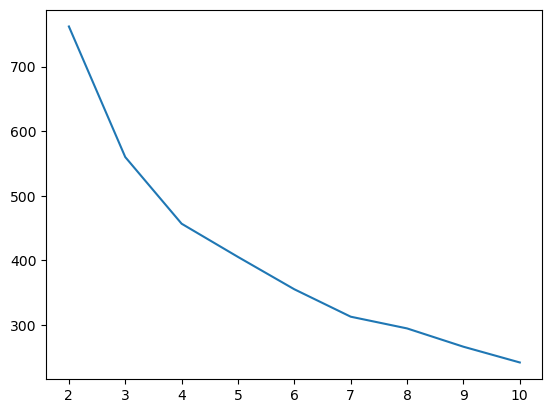

In [ ]:
# Elbow-curve/SSD Method
# List to store the Sum of Squared Distances (SSD) for each number of clusters
ssd = []

# Range of cluster numbers to test
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Loop through each cluster count in the defined range
for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters and fixed random state for reproducibility
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000, random_state=123)

    # Fit the KMeans model on the final PCA-transformed dataset
    kmeans.fit(X_pca_final)

    # Append the inertia (SSD) of the current model to the list
    ssd.append(kmeans.inertia_)


# plot the SSDs for each n_clusters
plt.plot(range_n_clusters, ssd)

### Interpretation:
- From the elbow method we can say that k = 3 clusters seems to be a good choice

### Note: Silhouette Score:

The silhouette score is a metric used to evaluate the quality of clustering. It measures how well-separated and cohesive the clusters are by comparing the intra-cluster distance (how close points are within the same cluster) and the inter-cluster distance (how far apart clusters are from each other).

For a single data point \(i\):
$$S(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

Where:
-`a(i)`: Average distance between the point \(i\) and all other points in the **same cluster** (intra-cluster distance).
-`b(i)`: Average distance between the point \(i\) and all points in the **nearest different cluster** (inter-cluster distance).

### Range of Silhouette Score:
- **+1**: The point is **well clustered**, meaning it is close to points in its own cluster and far from points in other clusters.
- **0**: The point lies **on or very close to the decision boundary** between two clusters.
- **-1**: The point is **poorly clustered**, meaning it may be assigned to the wrong cluster.

### Interpretation:
- High silhouette score (~1): Well-defined clusters.
- Low score (~0): Overlapping clusters.
- Negative score (<0): Points are likely assigned to the wrong clusters or the number of clusters is inappropriate.

### When to Use Silhouette Score:
- To evaluate the optimal number of clusters.
- To compare the performance of different clustering algorithms.
- Helps identify if clusters are compact and well-separated.

In [ ]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:

    # Intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3184327211540222
For n_clusters=3, the silhouette score is 0.3238502981955011
For n_clusters=4, the silhouette score is 0.30656921419450683
For n_clusters=5, the silhouette score is 0.2729479780901029
For n_clusters=6, the silhouette score is 0.2930370061289502
For n_clusters=7, the silhouette score is 0.29315135534218345
For n_clusters=8, the silhouette score is 0.29669755069913795
For n_clusters=9, the silhouette score is 0.2688772357560307
For n_clusters=10, the silhouette score is 0.29321496908017275


### Interpretation:
- The highest silhouette score suggests the best separation between clusters.
- n_clusters=3: The score is 0.3236, which is the highest among the given scores, indicating 3 clusters is likely the optimal choice.
- Decreasing Trend: After 3 clusters, the scores decline or fluctuate slightly, suggesting adding more clusters may not improve the quality of separation significantly.
- Lower Scores for Higher Clusters: Scores like 0.2517 for 5 clusters indicate poorer clustering quality, possibly due to over-segmentation or poorly defined clusters.

### Step 5: Build the final model with optimal 'k' value

In [ ]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=123)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=3, random_state=123)

In [ ]:
X_pca_final_df = pd.DataFrame(X_pca_final,columns=['PC1','PC2','PC3','PC4'])
X_pca_final_df['K_Means_Cluster_ID'] = kmeans.labels_


In [ ]:
X_pca_final_df

,PC1,PC2,PC3,PC4,K_Means_Cluster_ID
0,-3.130806,-0.471117,1.336274,0.641322,1
1,0.551781,-0.230632,-0.071234,-1.377036,2
2,-0.356257,-0.542354,-1.818159,-0.216783,2
3,-3.454323,1.114470,-1.553986,2.168457,1
4,1.308957,0.612033,-0.065287,-0.687559,2
...,...,...,...,...,...
148,-1.018529,-0.731559,-1.161339,-0.476265,2
149,-0.891335,0.907202,0.189163,-0.635586,2
150,0.331876,2.386196,-0.572829,-0.650777,2
151,-2.233628,-0.522003,-1.400054,0.649399,1


In [ ]:
# Checking the clusters
X_pca_final_df['K_Means_Cluster_ID'].unique()

array([1, 2, 0])

In [ ]:
# Checking a few values
X_pca_final_df['K_Means_Cluster_ID'][0:30]

0     1
1     2
2     2
3     1
4     2
5     2
6     2
7     0
8     0
9     2
10    0
11    0
12    2
13    2
14    2
15    0
16    2
17    1
18    2
19    2
20    2
21    1
22    2
23    2
24    1
25    1
26    2
27    1
28    0
29    2
Name: K_Means_Cluster_ID, dtype: int32

<Axes: xlabel='PC1', ylabel='PC2'>

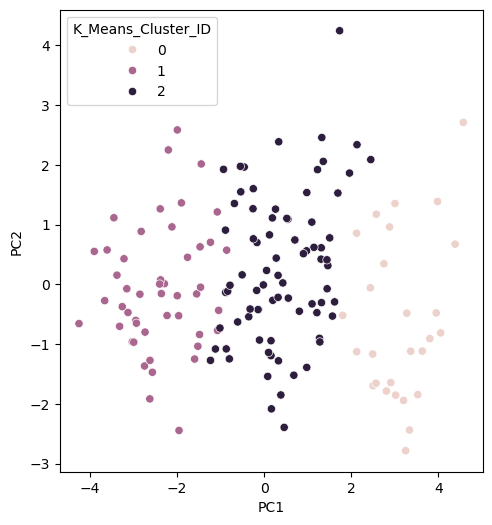

In [ ]:
# Scatter plot using the first two principal components to observe the cluster distribution

plt.figure(figsize=(12,6),dpi=100)

plt.subplot(1,2,1)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='K_Means_Cluster_ID')

### Observation:
- The plot shows 3 clusters labeled 0, 1, and 2, identified by the k-means algorithm.
- Cluster 2 (dark points) appears more distinct and concentrated compared to clusters 0 and 1.
- Clusters 0 (light pink) and 1 (purple) overlap to some extent, which might indicate that these clusters are not perfectly separated in feature space.
- This plot likely confirms that 3 clusters provide a good balance between separation and meaningful grouping.

<hr> <hr>

### Cluster Interpretation:

Based on the given clustering labelling, we can then check the properties of each cluster. This way we can form some hypothesis on the group of countries belonging to each cluster

In [ ]:
# Add the K-means cluster labels to the original data
merged_df = pd.concat([country_data_outliers_removed.reset_index(drop=True),
                       X_pca_final_df[['K_Means_Cluster_ID']]], axis=1)

# Preview the merged DataFrame
merged_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_Cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


##### Qualitative Interpretation

In [ ]:
### Let's briefly view the countries mapped to each cluster

### Cluster ID = 0
merged_df[merged_df['K_Means_Cluster_ID']==0].head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_Cluster_ID
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0
28,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0
41,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,0
42,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,0
43,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,0
52,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0


In [ ]:
### Cluster ID = 1
merged_df[merged_df['K_Means_Cluster_ID']==1].head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_Cluster_ID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1
24,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
25,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
27,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
30,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
31,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
35,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1


In [ ]:
### Cluster ID = 2
merged_df[merged_df['K_Means_Cluster_ID']==2].head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_Cluster_ID
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,2
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,2
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,2
16,Belize,18.8,58.2,5.20,57.5,7880,1.140,71.4,2.71,4340,2


When we briefly look at the list of countries and their different parameters, a distinctive pattern is emerging.
- Cluster 0 has mostly developed countries. The countries have low child mortality, high life expectacy and very high GDP per capita
- Similarly look at Cluster 1, it contains mostly underdeveloped or developing countries and Cluster 2 contains developing and emerging countries.

We can go ahead and do a bit of statistical analysis to verify this again

##### Statistical Interpretation

In [ ]:
# Select only numeric columns from the merged DataFrame
numeric_columns = merged_df.select_dtypes(include=[np.number])

# Add the K-Means cluster labels back to the numeric columns
numeric_columns['K_Means_Cluster_ID'] = merged_df['K_Means_Cluster_ID']
# Group by 'K_Means_Cluster_ID' and calculate the mean
cluster_summary = numeric_columns.groupby('K_Means_Cluster_ID').mean()


In [ ]:
round(cluster_summary,2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
K_Means_Cluster_ID,,,,,,,,,
0,4.78,45.66,9.25,43.33,37103.70,1.69,80.07,1.77,37540.74
1,83.27,28.84,6.10,41.72,4094.77,10.80,60.68,4.74,1936.06
2,20.12,42.30,6.34,49.04,12814.49,6.55,73.15,2.27,6585.18




##
### Cluster 0 Analysis
- **Child Mortality (4.78)**: Very low child mortality rate, indicating excellent healthcare and living conditions.
- **Exports (45.66%)**: Significant exports percentage, suggesting a strong, globally integrated economy.
- **Health (9.25)**: High health spending or a robust healthcare index, aligning with the low child mortality and high life expectancy.
- **Imports (43.33%)**: High import rate, likely indicating a balanced or open economy.
- **Income (37,103.70)**: High income level, suggesting that this cluster represents economically advanced countries.
- **Inflation (1.69%)**: Very low inflation, indicating stable economic conditions and controlled price levels.
- **Life Expectancy (80.07 years)**: High life expectancy, reflective of excellent healthcare and standards of living.
- **Total Fertility (1.77)**: Low fertility rates are common in developed countries with declining birth rates.
- **GDP per capita (37,540.74)**: High GDP per capita, suggesting high-income, developed countries.

**Summary of Cluster 0**: Likely represents advanced economies with high income, low child mortality, high life expectancy, and stable economic indicators. Countries here are economically stable with well-developed healthcare systems and low birth r##ates.

---

### Cluster 1 Analysis
- **Child Mortality (83.27)**: High child mortality rate, indicating significant healthcare and living standard challenges.
- **Exports (28.84%)**: Lower export percentage, possibly indicating a less diversified or smaller economy.
- **Health (6.10)**: Relatively low health metric, suggesting limited access to healthcare resources, aligning with the high child mortality.
- **Imports (41.72%)**: Moderate imports, indicating some economic openness but possibly a reliance on imported goods.
- **Income (4,094.77)**: Low income, indicating low-income or developing countries.
- **Inflation (10.80%)**: High inflation, associated with economic instability, which could impact purchasing power and financial security.
- **Life Expectancy (60.68 years)**: Low life expectancy, reflecting potential healthcare and sanitation challenges.
- **Total Fertility (4.74)**: High fertility rate, often correlated with lower economic development and limited access to family planning.
- **GDP per capita (1,936.06)**: Low GDP per capita, reinforcing that Cluster 1 likely represents low-income, developing countries.

**Summary of Cluster 1**: Likely includes developing countries with high child mortality, high fertility, low income, and economic instability. This group faces challenges in healthcare, economic stability, a##nd living standards
.

---

### Cluster 2 Analysis
- **Child Mortality (20.12)**: Moderate child mortality rate, suggesting middle-income countries with improving healthcare.
- **Exports (42.30%)**: Relatively high exports, indicating reliance on international trade.
- **Health (6.34)**: Moderate healthcare spending or access, indicating improvements but not at the level of Cluster 0.
- **Imports (49.04%)**: High imports suggest an open economy, likely integrated into global trade.
- **Income (12,814.49)**: Moderate income, indicating middle-income or emerging economies.
- **Inflation (6.55%)**: Moderate inflation, suggesting economic growth with some price instability.
- **Life Expectancy (73.15 years)**: Moderate life expectancy, reflecting decent healthcare and living conditions.
- **Total Fertility (2.27)**: Lower than Cluster 1 but higher than Cluster 0, typical of emerging or middle-income countries.
- **GDP per capita (6,585.18)**: Moderate GDP per capita, indicative of a growing economy with varying development levels.

**Summary of Cluster 2**: Likely represents middle-income or emerging economies with moderate healthcare and economic stability. Life expectancy and fertility rates show improvements over Cluster 1, and income and GDP reflect a growing economic profile with incr##eased integration into global trade.

---

### Comparative Summary of All Clusters
1. **Cluster 0**: **Developed, high-income countries** with strong economies, low child mortality, high healthcare spending, and high life expectancy.
2. **Cluster 1**: **Low-income, developing countries** with high child mortality, high fertility, economic instability, and lower healthcare standards.
3. **Cluster 2**: **Emerging or middle-income countries** showing moderate socio-economic and health indicators, representative of countrirging economies with improving socio-economic conditions.


#### Conclusive Insights:
This type of statistical analysis through clustering provides a powerful method for segmenting complex datasets, enabling insights into distinct socio-economic profiles or health conditions within each group. By examining each cluster’s unique characteristics, policymakers, researchers, and economists can better understand varying development stages, resource allocation needs, and potential intervention areas across different regions or populations. Such interpretations are essential in crafting targeted strategies for improvement, supporting tailored policymaking, and prioritizing development efforts. When applied to similar problem statements, clustering can reveal hidden patterns, aiding data-driven decision-making and strategic planning in diverse fields like healthcare, economics, and social development.


## Section 2: Hierarchical Clustering


Hierarchical clustering is an **unsupervised learning algorithm** that builds a hierarchy of clusters, represented using a **dendrogram** (tree-like structure).

### How It Works:
- **Agglomerative (Bottom-up)**: Starts with individual data points and merges them step by step into larger clusters.
- **Divisive (Top-down)**: Starts with all points in one cluster and recursively splits them into smaller clusters.

<center><img src="https://www.researchgate.net/publication/373368870/figure/fig5/AS:11431281183651568@1692965543107/Agglomerative-and-Divisive-clustering-indicating-dendrograms.png" width = 500/></center>

### Key Characteristics:
- No need to predefine the number of clusters.
- Dendrograms help visualize the clustering process and decide the optimal number of clusters.
- Computationally expensive for large datasets due to time complexity \(O(n^3)\).  


### Use Cases:
- Customer segmentation, gene sequencing, and document clustering.

In [ ]:
# Import libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score

### Note: Linkage in Hierarchical Clustering
Linkage refers to the method used to measure the distance between clusters when performing hierarchical clustering. As clusters are merged step-by-step in hierarchical clustering, the linkage method determines how the distance between two clusters is calculated.


### Single Linkage:
- Measures the distance between two clusters as the **minimum distance** between any two points from each cluster.
- Characteristics:
  - Tends to form long, chain-like clusters.
  - Sensitive to outliers: A single distant point can link two clusters.
  - Suitable when clusters are not well-separated but can struggle with noisy data.

### Complete Linkage:
- Measures the distance between two clusters as the **maximum distance** between any two points from each cluster.
- Characteristics:
  - Produces compact and spherical clusters.
  - Less sensitive to outliers compared to single linkage.
  - Can struggle when clusters are elongated or irregularly shaped.


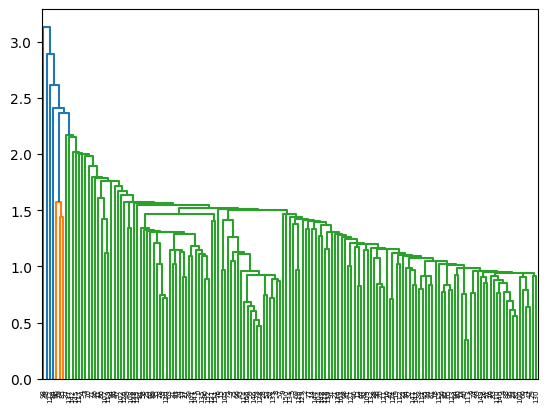

In [ ]:
# single linkage
# Generate the hierarchical clustering linkage matrix using 'single' linkage method
sl_mergings = linkage(X_scaled_df, method="single", metric='euclidean')
# 'X_scaled_df' is the scaled DataFrame with your data.
# 'single' linkage: Uses the minimum distance between points of two clusters to determine merging.
# 'euclidean': Uses Euclidean distance to compute the pairwise distances between observations.

# Plot the dendrogram to visualize the clustering hierarchy
dendrogram(sl_mergings)
# A dendrogram shows the sequence of cluster merges and at what distance they occur.

# Display the plot
plt.show()
# Displays the dendrogram to visually analyze the clusters.

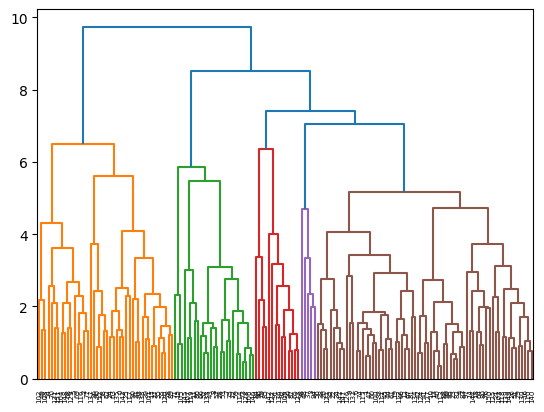

In [ ]:
# complete linkage
# Generate the hierarchical clustering linkage matrix using 'complete' linkage method
cl_mergings = linkage(X_scaled_df, method="complete", metric='euclidean')
# 'X_scaled_df' is the scaled DataFrame containing your data.
# 'complete' linkage: Uses the maximum distance between points of two clusters to determine merging.
# 'euclidean': Uses Euclidean distance to compute the pairwise distances between observations.

# Plot the dendrogram to visualize the hierarchical clustering
dendrogram(cl_mergings)
# The dendrogram displays the hierarchy of merges with each leaf representing a data point,
# and branches showing at what distance clusters are merged.

# Display the plot
plt.show()
# This renders the dendrogram to visually analyze the cluster formation and hierarchy.

Let's check the clusters of single and complete linkages.

In [ ]:
# 4 clusters using single linkge
# Extract cluster labels by cutting the dendrogram to form 4 clusters
sl_cluster_labels = cut_tree(sl_mergings, n_clusters=4).reshape(-1, )
# 'cut_tree()' cuts the hierarchical clustering dendrogram to create a fixed number of clusters.
# 'n_clusters=4' specifies the number of clusters to extract.
# 'reshape(-1, )' flattens the resulting array to a 1D array of cluster labels.

# sl_cluster_labels will now contain the cluster label assigned to each data point in the original dataset.
sl_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Interpretation:
- Most data points are assigned to cluster 0.


In [ ]:
# 4 clusters using complete linkage
# Extract cluster labels by cutting the complete linkage dendrogram to form 4 clusters
cl_cluster_labels = cut_tree(cl_mergings, n_clusters=4).reshape(-1, )
# 'cut_tree()' cuts the dendrogram formed by the hierarchical clustering to create the desired number of clusters.
# 'n_clusters=4' ensures that the data is divided into exactly 4 clusters.
# 'reshape(-1, )' flattens the output into a 1D array of cluster labels.

# The variable 'cl_cluster_labels' now contains the cluster label assigned to each data point in the original dataset.
cl_cluster_labels

array([0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 3, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 3,
       2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 3, 1, 1, 1, 1, 3, 3, 2, 3,
       1, 0, 0, 3, 3, 0, 1, 1, 3, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 3,
       1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 3, 3, 1, 1, 1, 1, 2, 0, 1, 0,
       1, 2, 1, 0, 3, 0, 0, 1, 1, 1, 3, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0])

### Interpretation:
- Shows a even distribution of points in all the 4 clusters.

<Axes: xlabel='PC1', ylabel='PC2'>

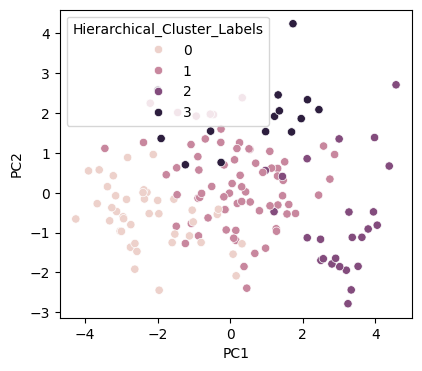

In [ ]:
X_pca_final_df = pd.DataFrame(X_pca_final,columns=['PC1','PC2','PC3','PC4'])
X_pca_final_df['Hierarchical_Cluster_Labels'] = cl_cluster_labels

# Plot the clusters
plt.figure(figsize=(10,4),dpi=100)
plt.subplot(1,2,2)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='Hierarchical_Cluster_Labels')

### Interpretation:
- The plot shows 4 clusters labeled 0, 1, 2, and 3
- The clusters appear partially overlapping, especially between clusters 0 and 1, indicating some shared characteristics in these regions.
- Cluster 3 (dark purple) is more separated and compact compared to the other clusters, suggesting clearer differentiation.
- Cluster sizes seem uneven. Cluster 0 and 1 contain more data points, while clusters 2 and 3 are smaller.
- The overlap between clusters indicates that the data might be challenging to segment perfectly, or the features used may not fully capture the underlying structure.
- As this plot uses PCA, only part of the variance is shown here. Further analysis in higher dimensions might provide deeper insights.

<hr> <hr>

## Section 3: Density based Clustering


Density-based clustering identifies clusters as dense regions of data points separated by areas of low density. It works well with arbitrary-shaped clusters and can detect outliers effectively.


### Key Characteristics:
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular algorithm.
- No need to predefine the number of clusters.
- Outliers are treated as noise if they lie in sparse regions.
- Works well for datasets with irregular cluster shapes.


### Challenges:
- Sensitive to parameter tuning (**ε** - neighborhood radius, **MinPts** - minimum points).
- Struggles with high-dimensional data due to increased computational complexity.


### Use Cases:
- Anomaly detection, spatial data analysis, and identifying clusters in complex datasets.

In [ ]:
# Import libraries
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

### Note:
- `eps` (Epsilon):
  - Controls the radius of the neighborhood around a point.
  - Points within this radius are considered part of the same neighborhood.
- `min_samples`:
  - The minimum number of points required to form a core point (a central point of a cluster).
  - If a point has fewer than `min_samples` neighbors within the `eps` radius, it is considered noise or a border point.

In [ ]:
# DBSCAN model
# Initialize the DBSCAN clustering model
dbscan = DBSCAN(eps=1.2, min_samples=4)
# 'eps=1.2': Defines the maximum distance between two points to be considered as neighbors.
#            A smaller value results in smaller, denser clusters, while a larger value allows more points in clusters.
# 'min_samples=4': The minimum number of points (including the core point) required to form a dense region (cluster).
#                  Points with fewer neighbors become noise or border points.
dbscan.fit(X_pca_final)

DBSCAN(eps=1.2, min_samples=4)

In [ ]:
# Print DBSCAN labels
# Noisy samples are given the label -1
dbscan.labels_

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,
       -1, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,
       -1,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
       -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
# Print silhouette score
silhouette_avg = silhouette_score(X_pca_final, dbscan.labels_)
print(silhouette_avg)

0.20114869892009732


### Interpretation:
- The low silhouette score indicates that the clusters are poorly defined.
- The data points may not be well-separated, with significant overlap between clusters or many points assigned to the wrong clusters.

Let's check the visualization and confirm this.

<Axes: xlabel='PC1', ylabel='PC2'>

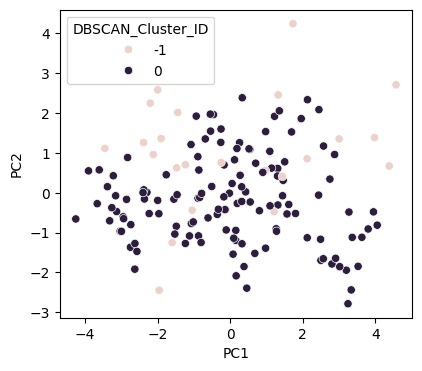

In [ ]:
# Assign cluster labels to each row in a new column DBSCAN_Cluster_ID
X_pca_final_df = pd.DataFrame(X_pca_final,columns=['PC1','PC2','PC3','PC4'])
X_pca_final_df['DBSCAN_Cluster_ID'] = dbscan.labels_

# scatter plot using the first two principal components to observe the cluster distribution
plt.figure(figsize=(10,4),dpi=100)
plt.subplot(1,2,1)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='DBSCAN_Cluster_ID')

### Interpretation:
- The plot shows one primary cluster (Cluster 0), represented by dark points.
- Points labeled -1 (light-colored) represent noise or outliers that DBSCAN could not assign to any cluster.
- The presence of many noise points indicates that the data may be sparse or not densely packed enough to form multiple clusters with the given parameters.
- DBSCAN’s performance depends heavily on the choice of ε (radius) and MinPts (minimum points per cluster). Adjusting these values might result in different clusters.
- The data distribution suggests that it might not have well-defined, dense clusters confirming the interpretation as per the silhoutte score value.

<hr><hr>